In [38]:
import json
import networkx as nx
import numpy as np 
import matplotlib.pyplot as plt
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
def list_json_file_paths(directory):
    return [
        os.path.join(directory, f)
        for f in os.listdir(directory)
        if f.endswith('.json') and (not f.startswith('config')) and os.path.isfile(os.path.join(directory, f))
    ][:-1]
def build_tree_from_dict(tree_dict, graph=None, parent=None):
    if graph is None:
        graph = nx.DiGraph()
    # Add node with attribute
    depth = tree_dict['depth']
    weights = tree_dict['weights'] if tree_dict['weights']!=None else []
    graph.add_node(tree_dict['id'], depth=depth, weights=weights)
    # Add edge from parent to current
    if parent is not None:
        graph.add_edge(parent, tree_dict['id'])
    # Recurse for children
    for child in tree_dict.get('children', []):
        build_tree_from_dict(child, graph, tree_dict['id'])
    return graph


def get_weights(solutions):
    all_weights = []
    for jsn in solutions:
        with open(jsn, 'r') as fin:
            solution = json.load(fin)
        # print(solution)
        G = build_tree_from_dict(solution['tree_lists'])
        temp = [(n, data['depth'], data['weights']) for n, data in G.nodes(data=True) if data['depth']!=[]]
        all_weights+=temp
    return all_weights

def mutual_correlation(vectors):
    arr = np.stack([np.asarray(v).ravel() for v in vectors])
    return np.corrcoef(arr)

def mutual_covariance(vectors):
    arr = np.stack([np.asarray(v).ravel() for v in vectors])
    return np.cov(arr)

def cos_similarity(vectors, eps=1e-12):
    X = np.stack([np.asarray(v).ravel() for v in vectors]).astype(float)
    norms = np.linalg.norm(X, axis=1)
    norms = np.maximum(norms, eps)
    X_normalized = X / norms[:, None]
    return X_normalized @ X_normalized.T

def plot_heatmap_with_borders(data, border_interval=5, lines=False):
    # Create the heatmap
    plt.figure(figsize=(10, 8))
    ax = sns.heatmap(data, cmap='plasma', cbar=True, linewidths=0.5, linecolor='gray')
    
    if lines:
        # Add borders every 'border_interval' cells
        n = data.shape[0]
        for i in range(0, n, border_interval):
            ax.axhline(i, color='black', linewidth=2)
            ax.axvline(i, color='black', linewidth=2)

        # Add final border lines at the end
        ax.axhline(n, color='black', linewidth=2)
        ax.axvline(n, color='black', linewidth=2)

    plt.title(f'Heatmap with Borders Every {border_interval} Cells')
    plt.show()

In [40]:
solutions = list_json_file_paths('output/gsm8k/gemma-2-2b/24_075307')
depth_weights = get_weights(solutions)
# print(depth_weights)

In [41]:
depth_weights

[(0, 0, []),
 (1,
  1,
  [[0.8224563598632812,
    0.5860158801078796,
    0.41100022196769714,
    1.0,
    0.3805420696735382,
    0.4763578772544861,
    0.5233527421951294,
    0.2725743055343628,
    0.33190375566482544,
    0.0,
    0.0907459482550621,
    0.8058786392211914,
    0.41246122121810913,
    0.21477976441383362,
    0.15656721591949463]]),
 (2,
  1,
  [[0.8224563598632812,
    0.5860158801078796,
    0.41100022196769714,
    1.0,
    0.3805420696735382,
    0.4763578772544861,
    0.5233527421951294,
    0.2725743055343628,
    0.33190375566482544,
    0.0,
    0.0907459482550621,
    0.8058786392211914,
    0.41246122121810913,
    0.21477976441383362,
    0.15656721591949463]]),
 (3,
  1,
  [[0.8224563598632812,
    0.5860158801078796,
    0.41100022196769714,
    1.0,
    0.3805420696735382,
    0.4763578772544861,
    0.5233527421951294,
    0.2725743055343628,
    0.33190375566482544,
    0.0,
    0.0907459482550621,
    0.8058786392211914,
    0.412461221218109

25


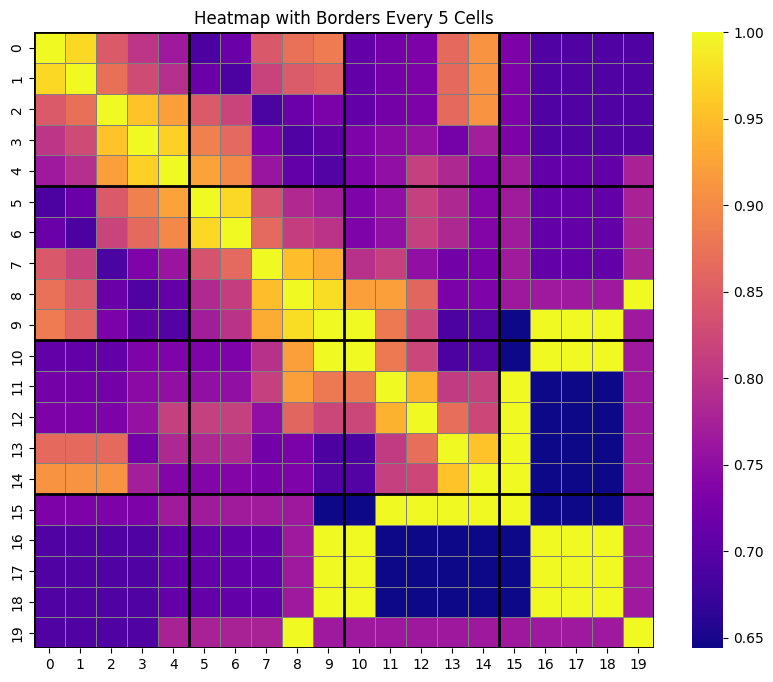

In [42]:
correlations = []
temp = []
for item in depth_weights[1:]:
    if item[0]!=0:
        temp.append(item[-1][0])
    else:
        correlations.append(cos_similarity(temp))
        temp=[]
max_depth = max(item[1] for item in depth_weights)
heatmap_size = 5*max_depth
print(heatmap_size)
heatmap = np.zeros(shape=(heatmap_size, heatmap_size))
scale = np.zeros(shape=(heatmap_size, heatmap_size))
for core_mat in correlations:
    for i in range(core_mat.shape[0]):
        for j in range(core_mat.shape[1]):
            heatmap[i, j]+=core_mat[i, j]
            scale[i, j]+=1
heatmap = heatmap/scale



plot_heatmap_with_borders(heatmap[:20, :20], lines=True)

        



In [36]:
print(np.var(heatmap[:5, :5]), np.var(heatmap[5:10, 5:10]), np.var(heatmap[10:15, 10:15]), np.var(heatmap[15:20, 15:20]))

0.004751254398566231 0.004646992429955949 0.007134164905157149 0.006791769094525782


In [5]:
all_thoughts

[(0, 0, []),
 (1,
  1,
  [[0.3177063763141632,
    0.23444418609142303,
    0.15005269646644592,
    0.08570718765258789,
    0.0,
    0.4257121980190277,
    0.20692764222621918,
    0.12301744520664215,
    0.6338112950325012,
    0.06958313286304474,
    0.032954227179288864,
    0.6679497361183167,
    0.22930708527565002,
    1.0,
    0.30637961626052856]]),
 (2,
  1,
  [[0.3177063763141632,
    0.23444418609142303,
    0.15005269646644592,
    0.08570718765258789,
    0.0,
    0.4257121980190277,
    0.20692764222621918,
    0.12301744520664215,
    0.6338112950325012,
    0.06958313286304474,
    0.032954227179288864,
    0.6679497361183167,
    0.22930708527565002,
    1.0,
    0.30637961626052856]]),
 (3,
  1,
  [[0.3177063763141632,
    0.23444418609142303,
    0.15005269646644592,
    0.08570718765258789,
    0.0,
    0.4257121980190277,
    0.20692764222621918,
    0.12301744520664215,
    0.6338112950325012,
    0.06958313286304474,
    0.032954227179288864,
    0.66794973

In [6]:
all_depth = list(set([item[1] for item in all_thoughts]))

for d in all_depth:
    temp = np.zeros(15)
    for _, de, we in all_thoughts:
        if de==d:
            for l in we:
                temp+=np.array(l)
                # print(l)
    print(d, temp)

0 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 [482.95822894 510.30725073 524.3254467  483.79700712 490.6704297
 506.261965   490.09909807 521.82064098 499.34346289 550.38675479
 490.85981235 504.08639774 531.97672901 532.21100928 518.83133132]
2 [530.5364871  510.39543003 425.89196891 552.60407597 496.14886314
 503.66129994 489.869425   527.87590355 539.97049749 530.78119904
 492.86631405 509.38313484 474.53876495 518.93138945 439.87452954]
3 [ 88.21793944 114.78386492  81.51959598  87.66338944  85.61722547
  67.88513541  76.69738829  79.63978976  92.80640125  71.53602004
  83.02675277  75.81692874  87.7718544   85.9540832   94.78572935]
4 [31.76217169 23.73963863  7.8106907  22.06623703 26.04319364 26.62162721
 24.80634272 26.86337858 27.8247413  17.19324023 30.07139355 25.72023124
 19.09308523 32.43788242 16.97873652]


{'id': 0, 'question': None, 'depth': 0, 'guide_embedding': '[i.tolist() for i in self.guide_embedding] if self.guide_embedding is not None else None', 'standard_answer': None, 'model_answer': None, 'cot_answer': None, 'clean_answer': None, 'is_true': False, 'reward': 0, 'cum_rewards': [0.5, 0.5, 1.0, 1.0, 1.3333333333333333, 1.3333333333333333, 1.3333333333333333, 1.3333333333333333, 0.8333333333333334], 'is_terminal': False, 'eva_process': [{'prompt': 'Based on the given question and the previous answers, please provide your analysis and final answer, starting the final answer with "Answer:"\n\nQuestion:\nIt takes Roque two hours to walk to work and one hour to ride his bike to work. Roque walks to and from work three times a week and rides his bike to and from work twice a week. How many hours in total does he take to get to and from work a week with walking and biking?\n\nYour previous answers:\n0. Thought: 2 hours to walk to work + 2 hours to walk back from work = 4 hours to walk t

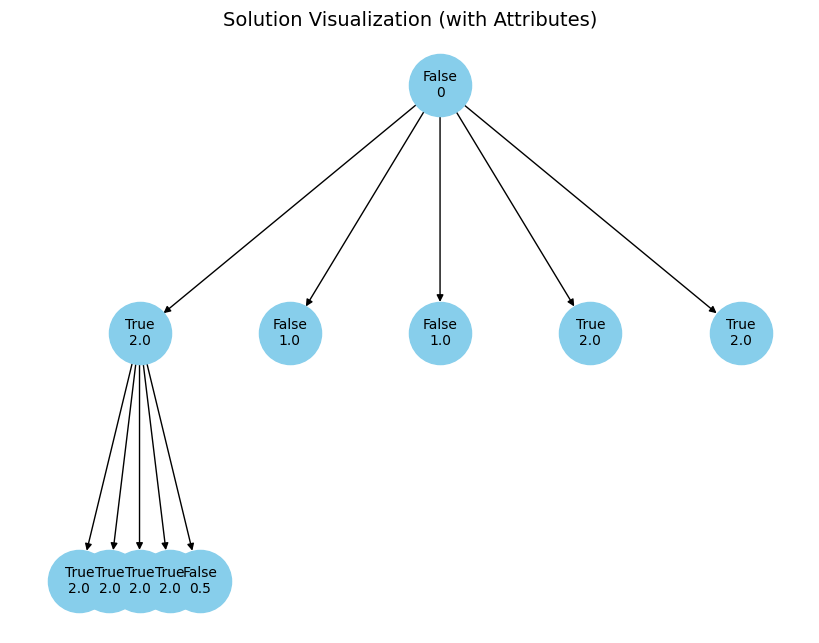

In [4]:
def build_tree_from_dict(tree_dict, graph=None, parent=None):
    if graph is None:
        graph = nx.DiGraph()
    # Add node with attribute
    graph.add_node(tree_dict['id'], is_true=tree_dict['is_true'], reward=tree_dict['reward'])
    # Add edge from parent to current
    if parent is not None:
        graph.add_edge(parent, tree_dict['id'])
    # Recurse for children
    for child in tree_dict.get('children', []):
        build_tree_from_dict(child, graph, tree_dict['id'])
    return graph


def hierarchy_pos(G, root=None, width=1., vert_gap=0.2, vert_loc=0, xcenter=0.5):
    if not nx.is_tree(G):
        raise TypeError("cannot use hierarchy_pos on a graph that is not a tree")

    if root is None:
        if isinstance(G, nx.DiGraph):
            root = [n for n, d in G.in_degree() if d == 0][0]
        else:
            root = list(G.nodes)[0]

    def _hierarchy_pos(G, root, leftmost, width, vert_gap, vert_loc, xcenter,
                       pos=None, parent=None, parsed=[]):
        if pos is None:
            pos = {root: (xcenter, vert_loc)}
        else:
            pos[root] = (xcenter, vert_loc)
        children = list(G.successors(root))
        if len(children) != 0:
            dx = width / len(children)
            nextx = xcenter - width / 2 - dx / 2
            for child in children:
                nextx += dx
                pos = _hierarchy_pos(G, child, leftmost, dx, vert_gap, vert_loc - vert_gap,
                                     nextx, pos, root, parsed)
        return pos

    return _hierarchy_pos(G, root, 0, width, vert_gap, vert_loc, xcenter)

with open('output/gsm8k/gemma-2-2b/22_034827/90.json', 'r') as fin:
    solution = json.load(fin)
print(solution['tree_lists'])
# Build graph
G = build_tree_from_dict(solution['tree_lists'])
print(G)
# Get hierarchical positions
pos = hierarchy_pos(G, root=0)
print(G.nodes(data=True))
labels = {n: f"{data['is_true']}\n{round(data['reward'], 2)}"
          for n, data in G.nodes(data=True)}

# Draw
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=False, node_size=2000, node_color="skyblue", arrows=True)
nx.draw_networkx_labels(G, pos, labels=labels, font_size=10)
plt.title("Solution Visualization (with Attributes)", fontsize=14)
plt.show()


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_heatmap_with_borders(data, border_interval=5):
    # Create the heatmap
    plt.figure(figsize=(10, 8))
    ax = sns.heatmap(data, cmap='viridis', cbar=True, linewidths=0.5, linecolor='gray')

    # Add borders every 'border_interval' cells
    n = data.shape[0]
    for i in range(0, n, border_interval):
        ax.axhline(i, color='black', linewidth=2)
        ax.axvline(i, color='black', linewidth=2)

    # Add final border lines at the end
    ax.axhline(n, color='black', linewidth=2)
    ax.axvline(n, color='black', linewidth=2)

    plt.title(f'Heatmap with Borders Every {border_interval} Cells')
    plt.show()

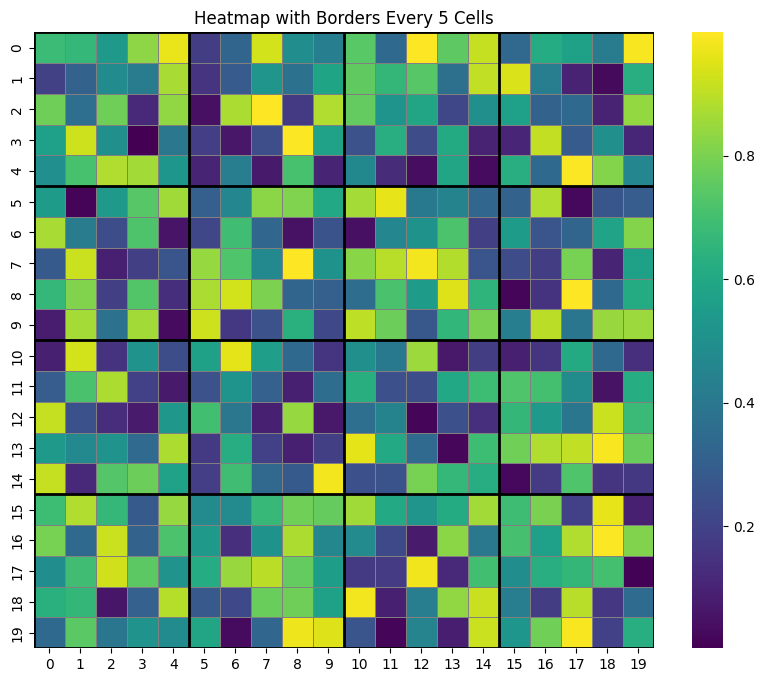

In [2]:
data = np.random.rand(20, 20)
plot_heatmap_with_borders(data)
